<a href="https://colab.research.google.com/github/DatumLearning/yolov8-image-object-detection/blob/main/yolov8_images_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics -q
!pip install pyyaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = YOLO("yolov8n.pt")

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

In [ ]:
model.predict("/content/car_and_dog.jpg" , save = True , save_txt = True)

Ultralytics YOLOv8.0.18 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[  0.00000, 161.00000, 491.00000, 432.00000,   0.75548,   2.00000],
         [134.00000,  66.00000, 220.00000, 178.00000,   0.73854,  16.00000]])]

In [ ]:
file_name = "../usr/local/lib/python3.8/dist-packages/ultralytics/yolo/data/datasets/coco8.yaml"
with open(file_name , "r") as stream:
  names = yaml.safe_load(stream)["names"]

In [ ]:
names

In [ ]:
lis = open("/content/runs/detect/predict/labels/car_and_dog.txt" , "r").readlines()

In [ ]:
lis

['16 0.345703 0.238281 0.167969 0.21875\n',
 '2 0.479492 0.579102 0.958984 0.529297\n']

In [ ]:
for l in lis:
  ind = int(l.split()[0])
  print(ind , names[ind])

16 dog
2 car


In [ ]:
float("0.21875\n")

0.21875

In [ ]:
li = lis[0].split()
xc , yc , nw , nh = float(li[1]) , float(li[2]) , float(li[3]) , float(li[4])

In [ ]:
img = cv2.imread("/content/car_and_dog.jpg")
h , w = img.shape[0] , img.shape[1]

In [ ]:
xc *= w
yc *= h
nw *= w
nh *= h
top_left = (int(xc - nw/2) , int(yc - nh/2))
bottom_right = (int(xc + nw/2) , int(yc + nh/2))

In [ ]:
top_left , bottom_right

((133, 65), (220, 177))

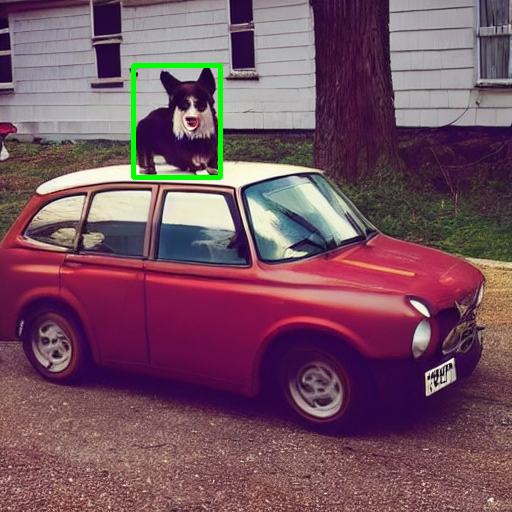

In [ ]:
img = cv2.rectangle(img , top_left , bottom_right , (0 , 255 , 0) , 3)
cv2_imshow(img)

In [ ]:
model.predict("/content/doggo.jpg" , save = True , save_txt = True)

Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[1.31000e+02, 2.20000e+02, 3.09000e+02, 5.42000e+02, 9.08002e-01, 1.60000e+01],
         [1.31000e+02, 1.40000e+02, 5.68000e+02, 4.21000e+02, 8.88764e-01, 1.00000e+00],
         [4.67000e+02, 7.50000e+01, 6.92000e+02, 1.72000e+02, 5.30585e-01, 2.00000e+00],
         [4.67000e+02, 7.50000e+01, 6.93000e+02, 1.72000e+02, 5.08616e-01, 7.00000e+00]])]